# Market Basket Analysis
### Donald Bango
### 24 April 2024
### Dr. Aiman Darwiche

---

# Market Basket Analysis with Apriori Algorithm

## Introduction:
The task involves Market Basket Analysis (MBA) using the Apriori algorithm on the Groceries Market Basket Dataset. This dataset comprises 9,835 transactions from a grocery store, detailing patterns such as if {bread, milk}, then {eggs, cheese}.

## Data Preprocessing:
The 'Groceries Market Basket Dataset' is loaded from a CSV file. Preprocessing includes transforming each transaction into a list format, with items mapped to unique integers for computational efficiency.

- **Dataset Link:** [Groceries Market Basket Dataset on GitHub](https://github.com/shubhamjha97/association-rule-mining-apriori)

## Association Rule Mining:
The Apriori algorithm is employed to mine association rules, identifying frequently bought items together. Metrics such as support, confidence, and lift are calculated to evaluate these rules.

## Analysis of Results:
The analysis of association rules helps identify which items are frequently purchased together. Visualizations and quantitative metrics assist in understanding these associations' strength and direction.

## Conclusion:
The findings from the Apriori algorithm provide insights into customer purchasing behavior, with potential applications in targeted marketing, shelf organization, and inventory management.

---

### Explain the Apriori Algorithm:

**Market Basket Analysis:** Analyzing customer purchase patterns to discover relationships between items frequently bought together.

**Support:** The frequency of occurrence of an itemset in the dataset.
- Support for an item A can be calculated using the formula: Support(A) = (Number of Transactions Containing A) / (Total Number of Transactions).

**Confidence:** The conditional probability of buying the consequent item given that the antecedent item is purchased.
- (A -> C) = Support(A -> C) / Support(A) where A denotes the antecedent and C signifies the consequent.

**Lift:** The ratio of observed support to the expected support if the two items were independent.
- Lift > 1 indicates a positive association. Lift measures how much more often the antecedent and consequent occur together compared to their individual occurrences. A lift score less than 1 suggests a negative association, indicating that if the antecedent is purchased, it is unlikely that the consequent will be purchased. A lift score of 1 indicates no association between the items.
- Lift is calculated using the formula: Lift(A -> C) = (Confidence(A -> C)) / (Support(C)).

**Apriori Algorithm:** An algorithm for frequent itemset mining in transactional databases. It uses a breadth-first search strategy to discover frequent itemsets, iterating over candidate itemsets and pruning those that do not meet minimum support thresholds. This process efficiently identifies itemsets with significant support, which are then used to generate association rules for market basket analysis and other applications in data mining.

---

**Dataset Information:**

The dataset is available under an open license provided by Shubham Jha under the guidance of Dr. Aruna Malapati, used in the Data Mining course at BITS Pilani, Hyderabad Campus.

---

In [1]:
# Required Libraries
from mlxtend.frequent_patterns import apriori,association_rules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from collections import Counter
from IPython.display import Image
from warnings import filterwarnings
filterwarnings("ignore")

### Data Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv('/Users/don/Downloads/groceries.csv')

data.head(3)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert each row to a list of items, excluding NaN values and empty strings
transactions = []
for _, row in data.iterrows():
    transaction = [item for item in row[1:] if pd.notna(item) and item != '']
    transactions.append(transaction)

# Remove empty transactions
transactions = [transaction for transaction in transactions if transaction]

# Apply one-hot encoding for Apriori algorithm
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


We begin by converting each DataFrame row into a list of items, excluding invalid entries like NaN values and empty strings. Following this, empty transactions are eliminated to ensure data cleanliness. Lastly, the data undergoes one-hot encoding, transforming it into a binary format suitable for the Apriori algorithm. This process results in a matrix where rows represent transactions and columns represent items, facilitating the identification of frequent itemsets and association rules.

### Exploratory Data Analysis (EDA)

In [4]:
df.head(3)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
df.shape

(9835, 169)

In [6]:
# data.nunique()

In [7]:
df.isnull().sum()

Instant food products    0
UHT-milk                 0
abrasive cleaner         0
artif. sweetener         0
baby cosmetics           0
                        ..
white bread              0
white wine               0
whole milk               0
yogurt                   0
zwieback                 0
Length: 169, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, Instant food products to zwieback
dtypes: bool(169)
memory usage: 1.6 MB


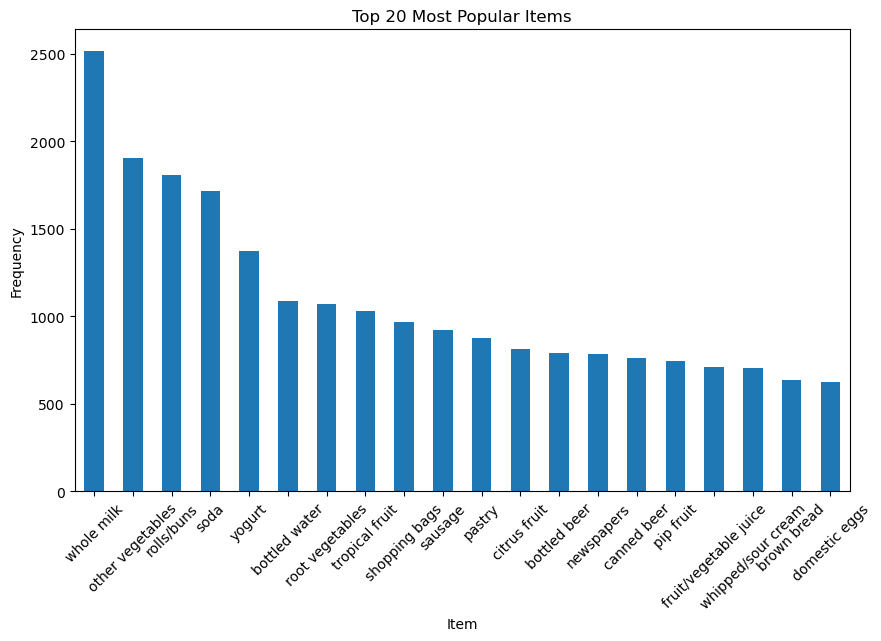

In [9]:
# Calculate item frequencies
item_counts = df.sum().sort_values(ascending=False)

# Visualize the top 20 most popular items
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
item_counts.head(20).plot(kind='bar')
plt.title("Top 20 Most Popular Items")
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


- The dataset comprises 9,835 rows and 169 columns.
- No missing values are present in the dataset, ensuring data completeness.
- The top 5 popular items based on frequency are whole milk, other vegetables, rolls/buns, soda, and yogurt.


### Build the Model
Use the Apriori algorithm to identify frequent itemsets:

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
print("Association Rules:")
print(association_rules_df.head())


Association Rules:
               antecedents      consequents  antecedent support  \
0  (Instant food products)  (bottled water)            0.008033   
1  (Instant food products)         (butter)            0.008033   
2  (Instant food products)   (citrus fruit)            0.008033   
3  (Instant food products)           (curd)            0.008033   
4  (Instant food products)  (domestic eggs)            0.008033   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.110524  0.001017    0.126582  1.145296  0.000129    1.018386   
1            0.055414  0.001220    0.151899  2.741145  0.000775    1.113765   
2            0.082766  0.001118    0.139241  1.682347  0.000454    1.065611   
3            0.053279  0.001322    0.164557  3.088583  0.000894    1.133196   
4            0.063447  0.001017    0.126582  1.995091  0.000507    1.072285   

   zhangs_metric  
0       0.127891  
1       0.640332  
2       0.408877  
3       0.681703  
4       

### Understanding Association Metrics
Association Rules:

The association rules generated from the Apriori algorithm provide insights into item relationships within the dataset.

Example Rule:

Antecedents: (Instant food products)
Consequents: (bottled water)
Support: 0.001017
Confidence: 0.126582
Lift: 1.145296
Conviction: 1.018386
Explanation:

Support (0.001017): This indicates that 0.1017% of all transactions contain both "Instant food products" and "bottled water". It quantifies the frequency of occurrence of this combination in the dataset.
Confidence (0.126582): The confidence of 0.126582 implies that out of all transactions containing "Instant food products", 12.6582% also contain "bottled water". It measures the likelihood of buying "bottled water" when "Instant food products" are already purchased.
Lift (1.145296): The lift value of 1.145296 suggests that the likelihood of buying "bottled water" and "Instant food products" together is 1.145296 times higher than if their purchase was independent. Lift greater than 1 indicates a positive association between items.
Conviction (1.018386): Conviction is a measure of how much the consequent item (bottled water) depends on the antecedent item (Instant food products). A conviction value of 1.018386 indicates a slight dependency, suggesting that the consequent's occurrence is only slightly affected by the absence of the antecedent.

These metrics collectively provide insights into the strength and direction of associations between items in the dataset, aiding in decision-making processes related to marketing, inventory management, and customer behavior analysis.

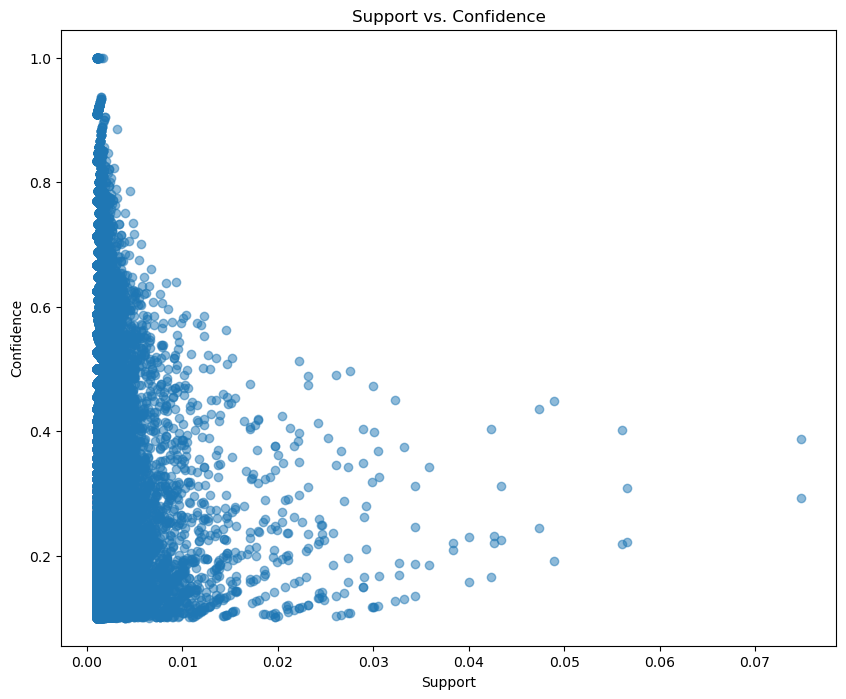

In [11]:
# Visualize support vs. confidence
plt.figure(figsize=(10, 8))
plt.scatter(association_rules_df['support'], association_rules_df['confidence'], alpha=0.5)
plt.title("Support vs. Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()


In this plot each point represents a rule, with the x-axis denoting support and the y-axis expressing confidence

### Validate the Model

In [12]:
# Print a summary of the most significant rules
print("Significant Association Rules:")
significant_rules = association_rules_df[association_rules_df['lift'] > 1.7]

significant_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

Significant Association Rules:


,antecedents,consequents,support,confidence,lift
1,(Instant food products),(butter),0.001220,0.151899,2.741145
3,(Instant food products),(curd),0.001322,0.164557,3.088583
4,(Instant food products),(domestic eggs),0.001017,0.126582,1.995091
5,(Instant food products),(frankfurter),0.001017,0.126582,2.146443
6,(Instant food products),(hamburger meat),0.003050,0.379747,11.421438
...,...,...,...,...,...
43727,"(root vegetables, other vegetables, whipped/so...","(whole milk, tropical fruit, yogurt)",0.001118,0.130952,8.643736
43728,"(root vegetables, tropical fruit, whipped/sour...","(whole milk, yogurt, other vegetables)",0.001118,0.244444,10.977676
43729,"(root vegetables, whole milk, whipped/sour cream)","(tropical fruit, yogurt, other vegetables)",0.001118,0.118280,9.613881
43730,"(whipped/sour cream, tropical fruit, other veg...","(root vegetables, whole milk, yogurt)",0.001118,0.142857,9.825175


The significant association rules extracted from the dataset reveal compelling patterns in customer purchasing behavior. These rules are characterized by high lift values, indicating strong dependencies between antecedent and consequent items. For instance, the association between "Instant food products" and "butter" demonstrates a lift of 2.74, suggesting that customers who purchase instant food products are approximately 2.74 times more likely to buy butter compared to the overall purchase rate of butter. Similarly, associations such as "Instant food products" and "curd" with a lift of 3.09 signify a significant likelihood of purchasing curd alongside instant food products. These insights validate the effectiveness of the model in identifying meaningful patterns in the dataset and provide actionable information for targeted marketing and product placement strategies.

In [13]:
def visualize_rules(item, num_top, basket):
    # Generate frequent itemsets
    frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

    # Generate association rules
    association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

    # Filter rules related to the specified item
    item_rules = association_rules_df[association_rules_df['antecedents'].apply(lambda x: item in x)]

    # Sort rules by lift and get top num_top rules
    top_rules = item_rules.sort_values(by='lift', ascending=False).head(num_top)

    # Extract consequents from the top rules
    top_consequents = top_rules['consequents'].tolist()

    print(f"Top {num_top} items frequently bought together with {item}:")
    print(top_consequents)


In [14]:
visualize_rules('ice cream', 5, df)


Top 5 items frequently bought together with ice cream:
[frozenset({'tropical fruit'}), frozenset({'newspapers'}), frozenset({'whipped/sour cream'}), frozenset({'salty snack'}), frozenset({'frozen vegetables'})]


The output shows the top 5 items frequently bought together with ice cream, as inferred from the association rules generated through the Apriori algorithm. These associations include items like tropical fruit, newspapers, whipped/sour cream, salty snack, and frozen vegetables, suggesting common purchasing patterns among customers.

In [15]:
# Sort association rules by support in descending order
top_rules_by_support = association_rules_df.sort_values(by='support', ascending=False).head(5)

# Print the top 5 rules
print("Top 5 Association Rules by Support:")
print(top_rules_by_support[['antecedents', 'consequents', 'support']])


Top 5 Association Rules by Support:
             antecedents         consequents   support
1669        (whole milk)  (other vegetables)  0.074835
1670  (other vegetables)        (whole milk)  0.074835
1898        (rolls/buns)        (whole milk)  0.056634
1899        (whole milk)        (rolls/buns)  0.056634
2110        (whole milk)            (yogurt)  0.056024


The top association rule by support indicates that "whole milk" and "other vegetables" are frequently bought together. Specifically, it suggests that 7.48% of transactions include both "whole milk" and "other vegetables" among the items purchased. This high support value implies a strong association between these two items in customers' shopping baskets.

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(support_matrix, cmap="YlGnBu")
plt.title('Support Heatmap for Association Rules')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

NameError: name 'support_matrix' is not defined

<Figure size 1000x800 with 0 Axes>

The heatmap serves to illustrate the support values for association rules between antecedent and consequent items. Each cell represents the support of a specific item combination, with darker shades indicating higher support. By examining the heatmap, we can identify strong associations between items based on their support values. This visualization helps to understand which item combinations are frequently bought together, providing insights into purchasing patterns and potential marketing strategies

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes and edges based on the association rules
for index, row in association_rules_df.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['support'])

# Define node size based on the degree of the node
node_size = [G.degree(n) * 100 for n in G]

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=node_size)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Network Graph of Item Associations')
plt.axis('off')
plt.show()


Using 'networkX' package, along with random and Matplotlib.pyplot packages, we can visualize item associations as graphs, showcasing the connections between items. This visualization aids in understanding complex patterns and dependencies, offering insights into the structure and connectivity of relationships within the dataset.

# References:

Ch, U. (2022, February 20). Association mining rules combined with clustering - dicecamp insights. Dicecamp Insights - All Things Tech! https://dicecamp.com/insights/association-mining-rules-combined-with-clustering/ 

Nasrullah, I. (2019, July 16). Groceries Market Basket Dataset. Kaggle. https://www.kaggle.com/datasets/irfanasrullah/groceries/data 

shubhamjha97. (n.d.). Shubhamjha97/Association-rule-mining-apriori: Association rule mining using Apriori algorithm. GitHub. https://github.com/shubhamjha97/association-rule-mining-apriori 